<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [63]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)) # add color channel
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_train, x_test = x_train/255.0, x_test/255.0
label_train, label_test = to_categorical(y_train), to_categorical(y_test) # one-hot encoding

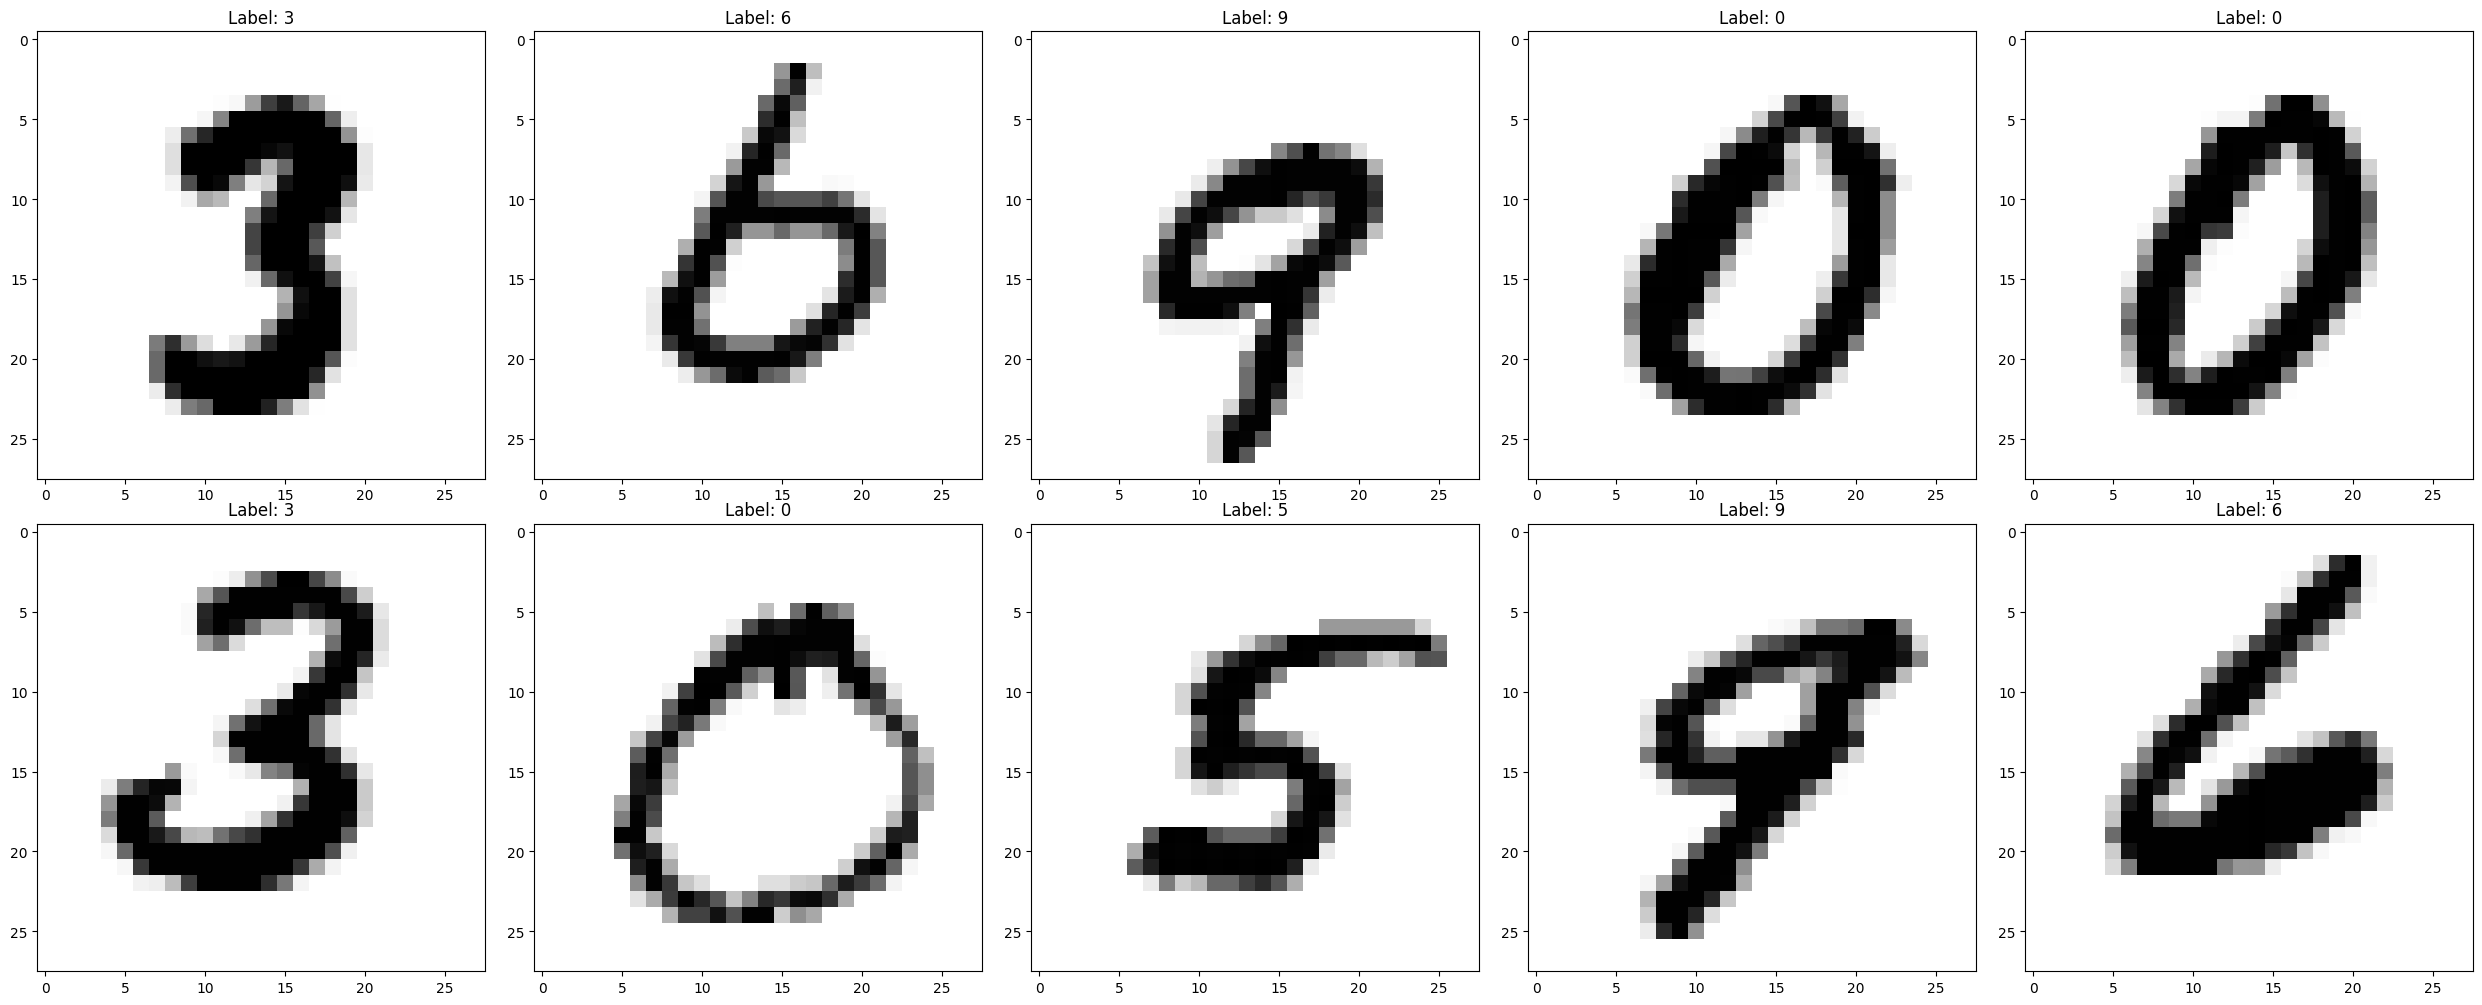

In [14]:
num_row, num_col = 2, 5

idx = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,)) # subset 10 figures
x_train10, y_train10 = x_train[idx], y_train[idx]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(25, 10))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train10[i])))
    ax.imshow(x_train10[i], cmap=cm.binary)

plt.tight_layout()
plt.show()

In [64]:
x_train_f = x_train[:100]
x_test_f = x_test[:25]
label_train_f = label_train[:100]
label_test_f = label_test[:25]

In [136]:
num_filter = 100
mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter,
                     kernel_size = (2,2),
                     padding = 'same',
                     strides=1,
                     activation="relu",
                     input_shape = (28,28,1))) # convo
#mnist_cnn.add(MaxPool2D(pool_size=(3,3))) # pooling
mnist_cnn.add(Conv2D(filters = num_filter, kernel_size = (2,2),padding = 'same', activation ='relu')) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(2,2)))
mnist_cnn.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])
#y_pred = mnist_cnn.predict(x_train_f)
x_pred = mnist_cnn.predict(x_train_f, batch_size=None, verbose="1", steps=None, callbacks=None)

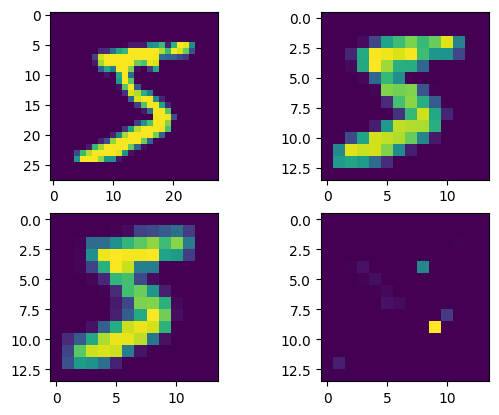

In [138]:
plt.subplot(2, 2, 1)
plt.imshow(x_train_f[0])
plt.subplot(2, 2, 2)
plt.imshow(x_pred[0,:,:,7])
plt.subplot(2, 2, 3)
plt.imshow(x_pred[0,:,:,8])
plt.subplot(2, 2, 4)
plt.imshow(x_pred[0,:,:,99])

In [9]:
mnist_cnn = models.Sequential()
mnist_cnn.add(Conv2D(filters = 28, kernel_size = (4,4),padding = 'Same', activation ='relu', input_shape = (28,28,1))) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(4,4))) # pooling
mnist_cnn.add(Conv2D(filters = 14, kernel_size = (4,4),padding = 'Same', activation ='relu')) # convo + ReLU
mnist_cnn.add(MaxPool2D(pool_size=(4,4), strides=(2,2)))
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(256, activation = "relu"))
mnist_cnn.add(Dense(10, activation = "softmax"))

In [10]:
# compile model
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
# train model
y_pred = mnist_cnn.fit(x_train, label_train, epochs = 10, batch_size = 250, validation_data=(x_test, label_test))

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.1319 - loss: 2.2858 - val_accuracy: 0.3778 - val_loss: 2.2148
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.4613 - loss: 2.1412 - val_accuracy: 0.6487 - val_loss: 1.5890
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.7066 - loss: 1.2924 - val_accuracy: 0.8221 - val_loss: 0.6493
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.8325 - loss: 0.5838 - val_accuracy: 0.8764 - val_loss: 0.4061
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8825 - loss: 0.3944 - val_accuracy: 0.9027 - val_loss: 0.3156
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.9036 - loss: 0.3134 - val_accuracy: 0.9206 - val_loss: 0.2577
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9196 - loss: 0.2648 - val_accuracy: 0.9305 - val_loss: 0.2227
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9293 - loss: 0.2330 - 

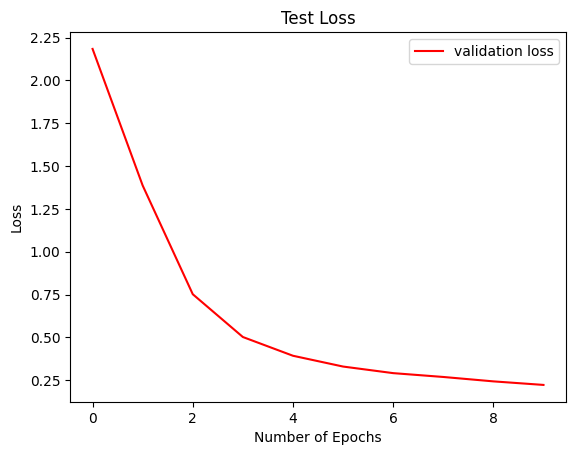

In [ ]:
plt.plot(y_pred.history['val_loss'], color='r', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


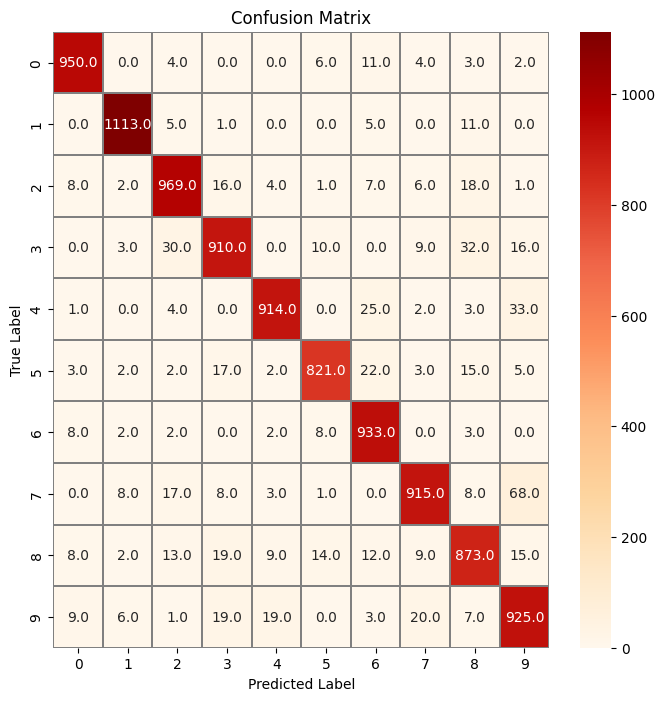

In [ ]:
Y_pred = mnist_cnn.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(label_test,axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install gudhi
import gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.0 MB/s eta 0:00:00
